In [16]:
# import local package from a folder
import markovish as mp
import seaborn as sns


In [3]:
dir(mp)


['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'blanc_table',
 'confint',
 'datetime',
 'freq_table',
 'get_seq_from_lens',
 'maxlen',
 'os',
 'pd',
 'permutate',
 'plt',
 'prob_table',
 'randint',
 'sns',
 'st',
 'txt_seq_read']

In [5]:
# getting data set
file = 'sample_data.txt'
data = mp.txt_seq_read(file)
print(data)


All data length = 84, includes 10 sequences.
[['1', 'awake', 'teeth', 'gym', 'cofee', 'news', 'taxi', 'job', '2'], ['1', 'awake', 'teeth', 'gym', 'cofee', 'news', 'taxi', 'job', '2'], ['1', 'awake', 'teeth', 'gym', 'cofee', 'news', 'taxi', 'job', '2'], ['1', 'awake', 'gym', 'cofee', 'news', 'taxi', 'job', '2'], ['1', 'awake', 'gym', 'cofee', 'news', 'taxi', 'job', '2'], ['1', 'awake', 'gym', 'cofee', 'news', 'taxi', 'job', '2'], ['1', 'awake', 'gym', 'cofee', 'news', 'taxi', 'job', '2'], ['1', 'awake', 'gym', 'cofee', 'news', 'beer', 'taxi', 'job', '2'], ['1', 'awake', 'gym', 'cofee', 'news', 'beer', 'taxi', 'job', '2'], ['1', 'awake', 'news', 'beer', 'walk', 'job', '2']]


In [6]:
# build blanc table
bl_tab = mp.blanc_table(data)
print(bl_tab)


       awake  teeth  gym  walk  cofee  beer  news  taxi  job
awake    0.0    0.0  0.0   0.0    0.0   0.0   0.0   0.0  0.0
teeth    0.0    0.0  0.0   0.0    0.0   0.0   0.0   0.0  0.0
gym      0.0    0.0  0.0   0.0    0.0   0.0   0.0   0.0  0.0
walk     0.0    0.0  0.0   0.0    0.0   0.0   0.0   0.0  0.0
cofee    0.0    0.0  0.0   0.0    0.0   0.0   0.0   0.0  0.0
beer     0.0    0.0  0.0   0.0    0.0   0.0   0.0   0.0  0.0
news     0.0    0.0  0.0   0.0    0.0   0.0   0.0   0.0  0.0
taxi     0.0    0.0  0.0   0.0    0.0   0.0   0.0   0.0  0.0
job      0.0    0.0  0.0   0.0    0.0   0.0   0.0   0.0  0.0


In [8]:
# count frequencies
freqs = mp.freq_table(bl_tab, data)
freqs


,awake,teeth,gym,walk,cofee,beer,news,taxi,job
awake,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0
teeth,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
gym,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
walk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
cofee,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0
beer,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
news,0.0,0.0,0.0,0.0,0.0,3.0,0.0,7.0,0.0
taxi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
job,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# count probabilities
probs = mp.prob_table(bl_tab, freqs)
probs


,awake,teeth,gym,walk,cofee,beer,news,taxi,job
awake,0.0,0.3,0.6,0.00,0.0,0.0,0.1,0.00,0.0
teeth,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.00,0.0
gym,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.00,0.0
walk,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,1.0
cofee,0.0,0.0,0.0,0.00,0.0,0.0,1.0,0.00,0.0
beer,0.0,0.0,0.0,0.33,0.0,0.0,0.0,0.67,0.0
news,0.0,0.0,0.0,0.00,0.0,0.3,0.0,0.70,0.0
taxi,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,1.0
job,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0


In [11]:
#create resampled data set
res_data = mp.permutate(data)
print(len(data), len(res_data))


Progress: 
100.0
Done!
10 99990


In [13]:
# calculate parameters of a resampled data set
res_freqs = mp.freq_table(bl_tab, res_data) # may be slow because of dataset length
res_probs = mp.prob_table(bl_tab, res_freqs)
res_probs


,awake,teeth,gym,walk,cofee,beer,news,taxi,job
awake,0.00,0.20,0.47,0.00,0.23,0.05,0.05,0.00,0.00
teeth,0.17,0.00,0.50,0.00,0.34,0.00,0.00,0.00,0.00
gym,0.13,0.06,0.00,0.00,0.46,0.00,0.36,0.00,0.00
walk,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.67
cofee,0.00,0.00,0.18,0.00,0.00,0.07,0.46,0.29,0.00
beer,0.00,0.00,0.00,0.08,0.00,0.00,0.19,0.33,0.39
news,0.03,0.00,0.00,0.05,0.16,0.13,0.00,0.38,0.26
taxi,0.00,0.00,0.00,0.00,0.00,0.04,0.18,0.00,0.78
job,0.00,0.00,0.00,0.13,0.00,0.00,0.00,0.87,0.00


In [14]:
# count difference between native and resamples data
diff = probs - res_probs
diff


,awake,teeth,gym,walk,cofee,beer,news,taxi,job
awake,0.00,0.10,0.13,0.00,-0.23,-0.05,0.05,0.00,0.00
teeth,-0.17,0.00,0.50,0.00,-0.34,0.00,0.00,0.00,0.00
gym,-0.13,-0.06,0.00,0.00,0.54,0.00,-0.36,0.00,0.00
walk,0.00,0.00,0.00,0.00,0.00,-0.33,0.00,0.00,0.33
cofee,0.00,0.00,-0.18,0.00,0.00,-0.07,0.54,-0.29,0.00
beer,0.00,0.00,0.00,0.25,0.00,0.00,-0.19,0.34,-0.39
news,-0.03,0.00,0.00,-0.05,-0.16,0.17,0.00,0.32,-0.26
taxi,0.00,0.00,0.00,0.00,0.00,-0.04,-0.18,0.00,0.22
job,0.00,0.00,0.00,-0.13,0.00,0.00,0.00,-0.87,0.00


<Axes: >

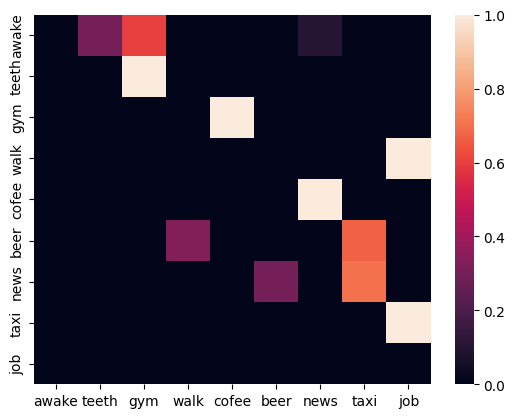

In [17]:
# visualize native probabilities
sns.heatmap(probs)


<Axes: >

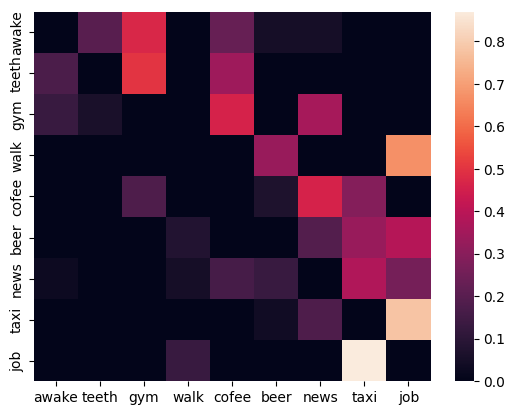

In [18]:
# visualize resampled probabilities
sns.heatmap(res_probs)


<Axes: >

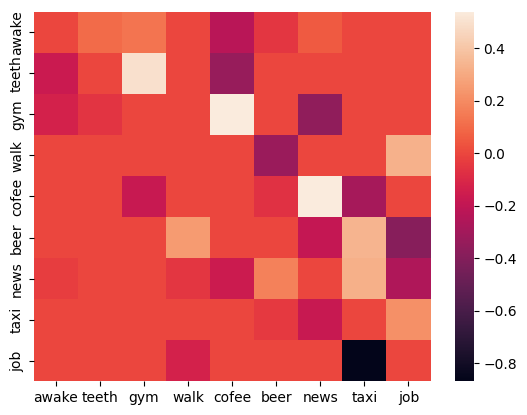

In [19]:
# visualize most threatened probabilities
sns.heatmap(diff)


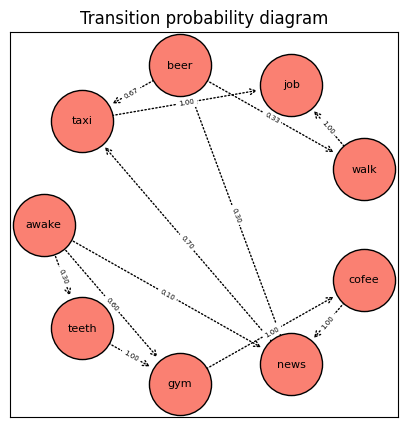

In [28]:
## CODE BELOW IS GOING TO BE IMPLEMENTED AS A FUCNCTION
## MAYBE IT HAPPEN WHAN A CRAYFISH WHISTLE ON A MOUNTAIN
import networkx as nx
from matplotlib import pyplot as plt 
# PARAMS
width = 5
height = 5
savefig = True
data = probs
threshold = 0
node_font_size = 8
node_color = 'salmon'
pic_format = '.svg'

# SET GRAPH SIZE
plt.figure(figsize=(width, height))
# ADD GRAPH OBJECT
G = nx.DiGraph()
# GET COLUMN NAMES
labels = data.columns
for start in labels: # Перебираем все ячейки
    for end in labels:
        if data.loc[start, end] > threshold: # Добавляем ноды, где не пусто
            G.add_edge(start, end, weight=data.loc[start, end])
pos = nx.shell_layout(G)  #  shell_layout spiral_layout spectral_layout spring_layout
# DRAW NODES
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color=node_color, node_shape='o', 
                       # YOU CAN TRY FOLLOWING node_shape -  so^>v<dph8
                       edgecolors='black')

# ADD NODE LABELS
nx.draw_networkx_labels(G, pos, font_size=node_font_size, font_family='sans-serif')
# ADD EDGES
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=10,style='dotted',min_target_margin=25)
# ADD EDGE LABELS
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5)

# you can try another layout of block positions above

# SHOW GRAPH

plt.title('Transition probability diagram')
if savefig:
    plt.savefig("Markov_chain_graph" + pic_format)
plt.show()   
